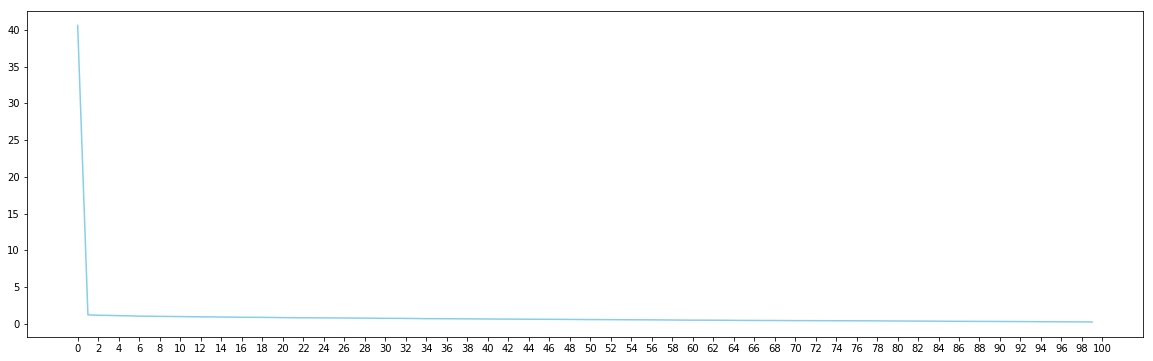

('As we can see from the graph, we have to take ', 1, 'components for retaining the ', 20.0, '% information')


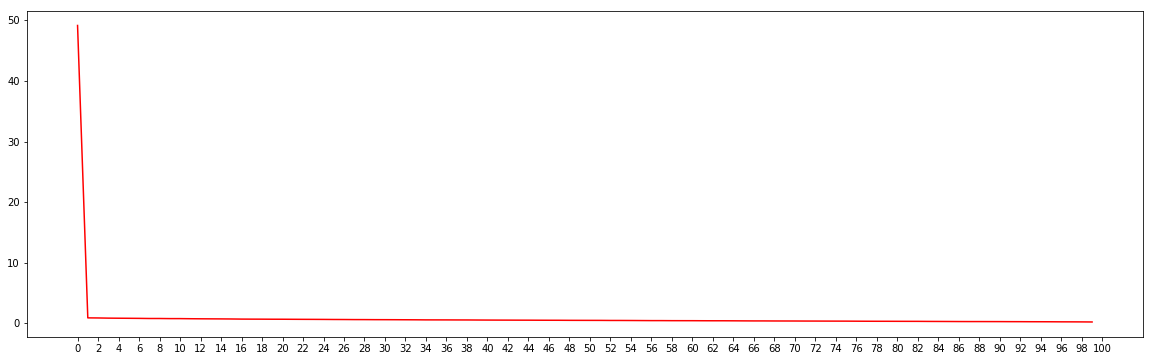

('As we can see from the graph, we have to take ', 47, 'components for retaining the ', 80.0, '% information')


In [30]:
'''
Name: Aditya Sawwalakhe
B Number: B00816689
'''

''' Importing required libraries for the program '''

from sklearn import preprocessing
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA


'''loading the dataset files from folder and preprocessing the dataset by removing the NA values'''
df_1 = pd.read_csv('dist1_500_1.txt', sep=" ").dropna()
df_2 = pd.read_csv('dist1_500_2.txt', sep=" ").dropna()
df_3 = pd.read_csv('dist2_500_1.txt', sep=" ").dropna()
df_4 = pd.read_csv('dist2_500_2.txt', sep=" ").dropna()

'''Concatatening the files to form one dataframe per dataset'''
df1 = pd.concat([df_1, df_2])
df2 = pd.concat([df_3, df_4])


'''Defining a function for the applying the PCA algorithm on dataset'''
def applyPCA(df,thershold1, colorForGraph):
    '''
    this function takes a df(dataset), thershold(how much information is to be retain) and color of graph as a input
    '''

    '''Now defining the PCA'''
    pca = PCA()
    pca.fit(df)


    '''Calculating the number of componenets given the thershold (required information retain)'''
    def CalCulateNumberOfComponent(eigen_values,thershold):
        sum_of_all_eigen_value = sum(eigen_values)
        for i in range(1, len(eigen_values)+1):
            if((sum(eigen_values[:i])/sum_of_all_eigen_value) >= thershold):
                return i


    # min_max_scaler = preprocessing.MinMaxScaler()
    # np_scaled = min_max_scaler.fit_transform(df1)
    # df_normalized = pd.DataFrame(np_scaled)

    '''
        plotting eigen values for the dataset
    '''
    EigenValues = pca.explained_variance_
    plt.figure(figsize=(20, 6))
    plt.xticks(range(0,101,2))
    plt.plot(pca.explained_variance_ratio_*100, c=colorForGraph)
    plt.show()
    

    K = CalCulateNumberOfComponent(EigenValues,thershold1)
    print("As we can see from the graph, we have to take ", K, "components for retaining the ",thershold1*100,"% information")
    return None 
applyPCA(df1, 0.20, "skyblue")
applyPCA(df2,0.80, "red")

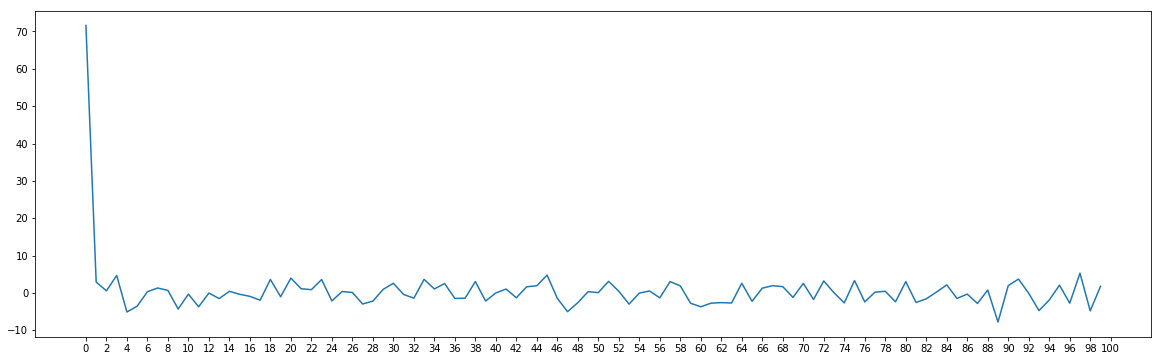

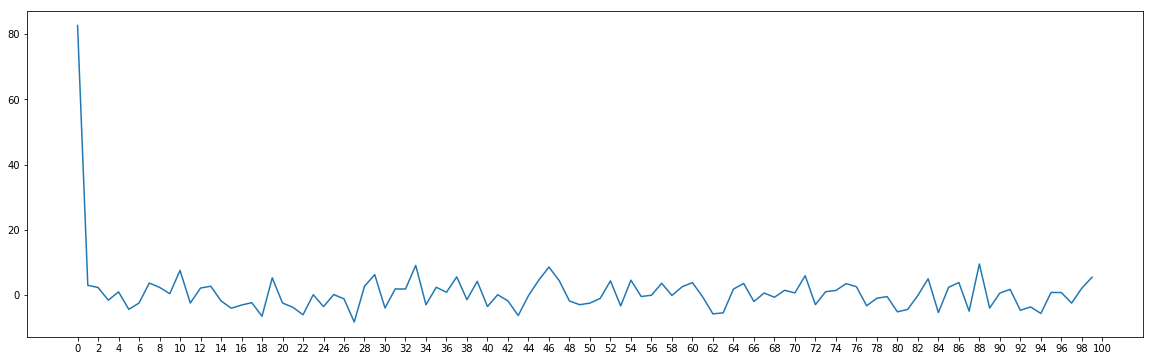

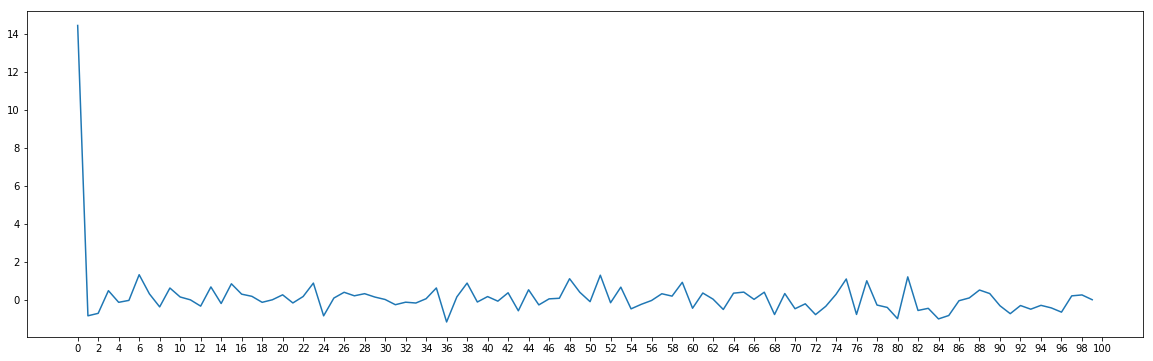

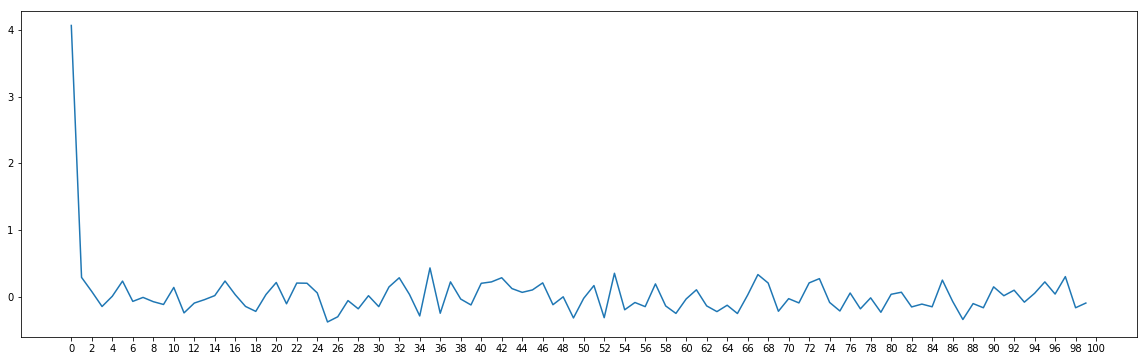

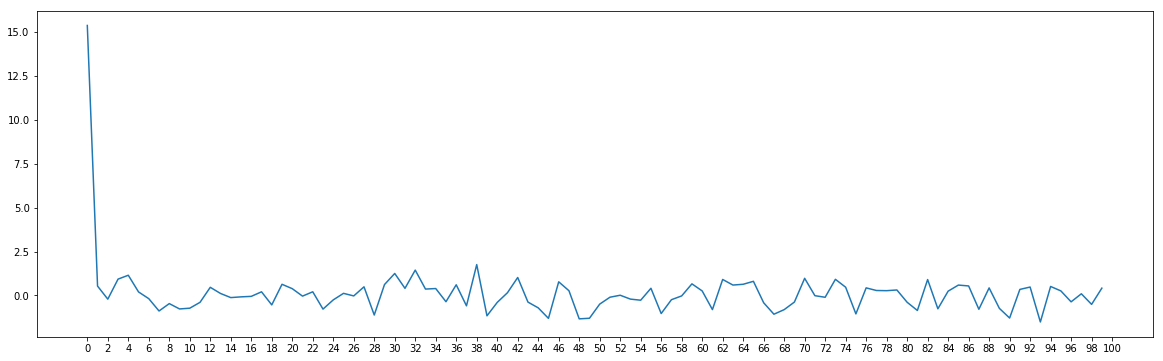

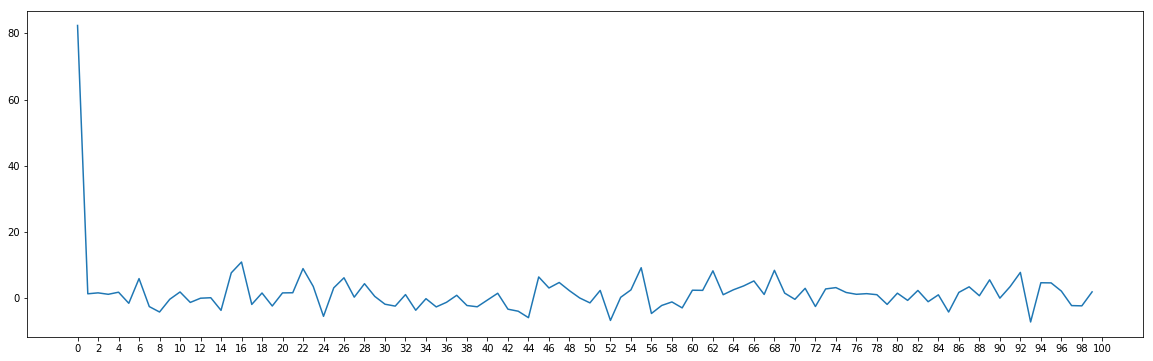

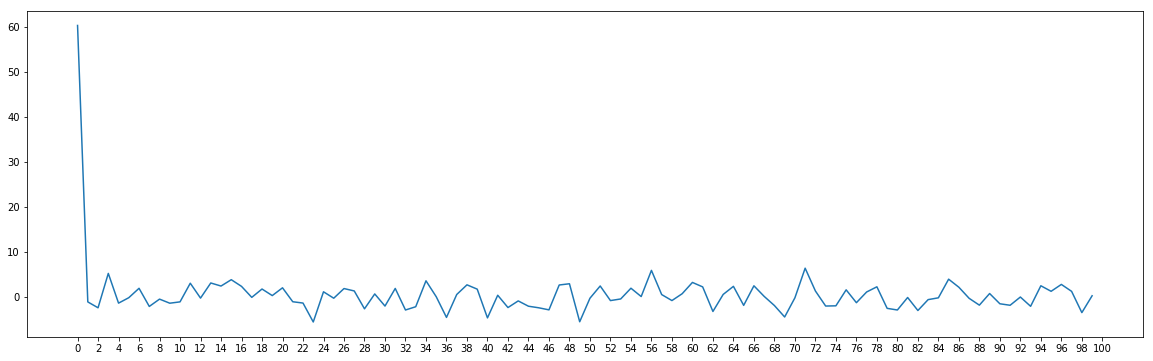

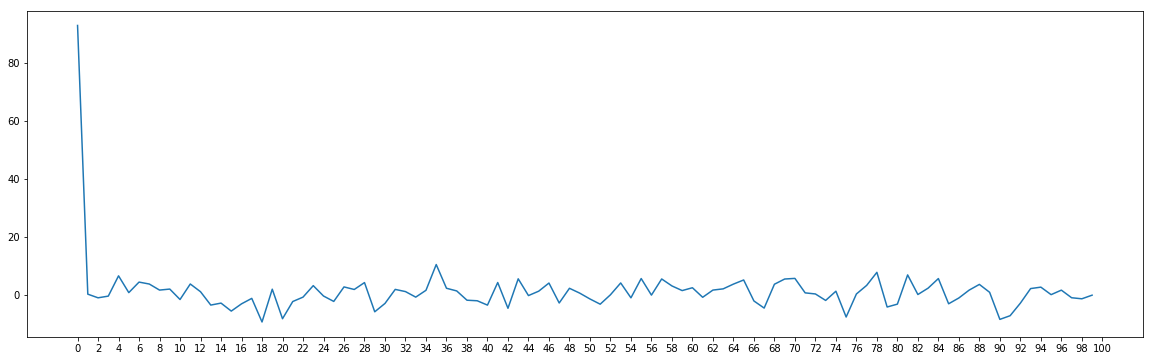

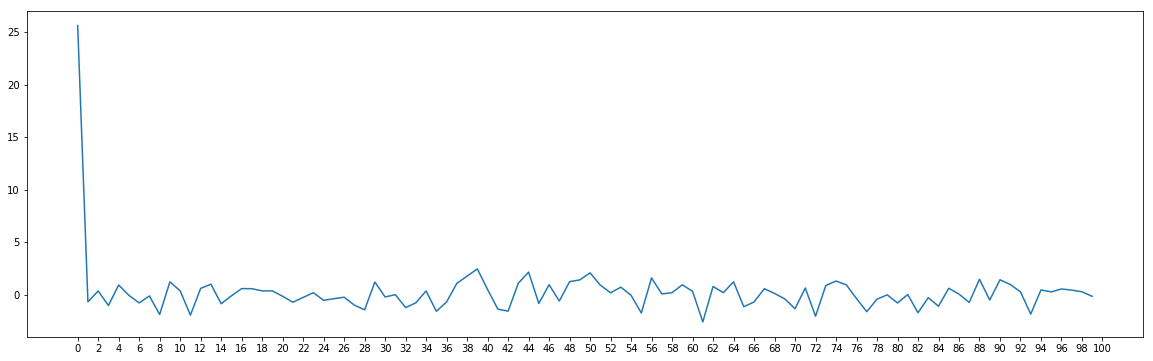

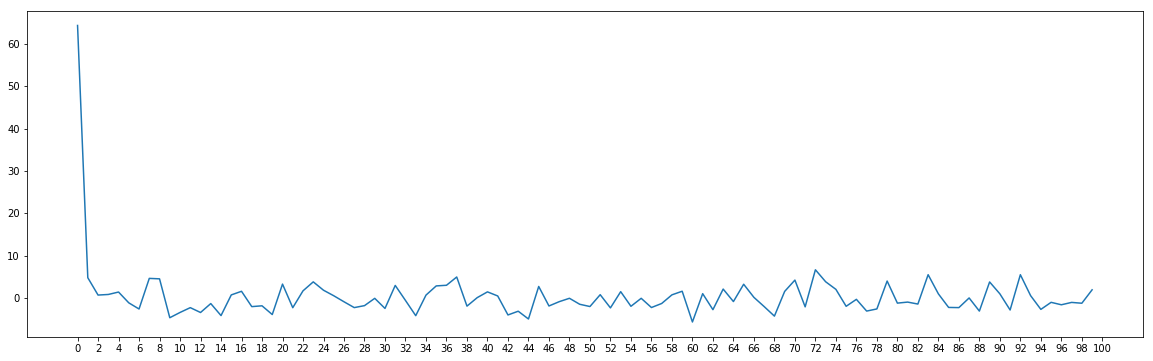

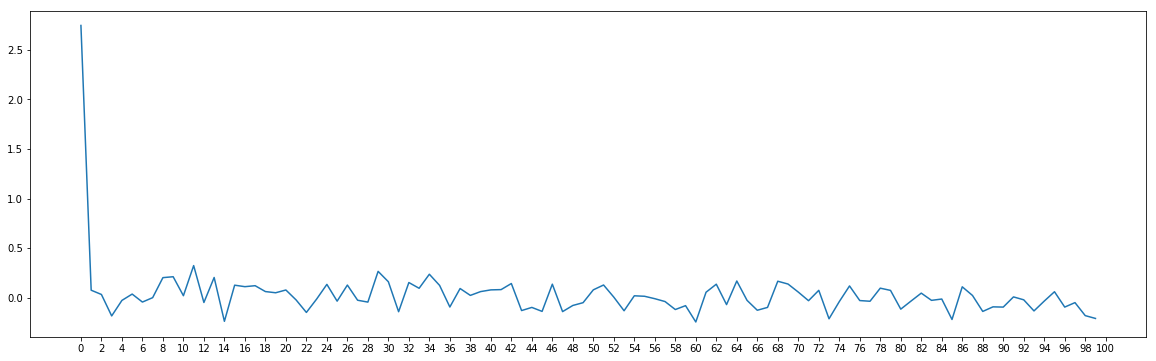

KeyboardInterrupt: 

In [33]:
'''Implementing the individualized dct algorithm '''

''' Importing required libraries for the program '''
from numpy import diff
from scipy.fftpack import dct
from sklearn.cluster import KMeans
from itertools import groupby
        
def applyingDCT(df, color):
    ''' Applying the dct for each vector (each row) for input dataframe(dataset) '''

    dct_array = []
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(df)
    df_normalized = pd.DataFrame(np_scaled)

    for i in df_normalized.to_numpy():
        dct_array.append(dct(i))

    '''Plotting the every 1000 transformed vector on graph'''    
    for i in dct_array:
        plt.figure(figsize=(20, 6))
        plt.xticks(range(0,101,2))
        plt.plot(i)
        plt.show()

    ''' 
            Now I am going to find the critical point or turning point for each vector where 
        removing components doesn't result in much energy / information loss according to power law.      
        Intuitively one can find the the critical point where function is becoming constant using second
        order derivative of the function.Therefore, I am applying secondOrderDerivative() on each vector 
        and it will give me turning point for each vector. 
    '''
    
    def doubleDerivative(vector):
        x = np.arange(1, 100)
        firstOrderDerivative = diff(vector)/x
        secondOrderDerivative =  diff(firstOrderDerivative)/diff(x)
        for i in secondOrderDerivative:
            if(i < 0):
                return np.where(secondOrderDerivative == i)[0][0]

    list_of_no_components_for_each_value = [] #this list is to store the critical point for each of the vector 
    for i in dct_array:
        list_of_no_components_for_each_value.append(doubleDerivative(i))

    list_of_no_components_for_each_value.sort()

    '''   Now after getting the number of features/ dimentions for components, I applied K means clustering 
    algorithm to select the number of dimensions for each vector. '''

    kmeans = KMeans(n_clusters=4)  
    X = np.array(list_of_no_components_for_each_value).reshape(-1,1)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    
    plt.scatter(X[:, -1], X[:, 0], c=y_kmeans, s=20)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, -1], centers[:, 0], c=color, s=200, alpha=0.5)
    plt.show()
    '''Only taking four componenets from the array as fifth component can be seens as outlier(too far from both centers)'''
    return 

applyingDCT(df1, "blue")
applyingDCT(df2, "red")